In [1]:
import pandas as pd
import mplfinance as mpf
import talib
import numpy as np


In [2]:
Query = """
Stop above EMA_51
"""

In [3]:
ohlc = pd.read_csv("../Src/xauusdm15.filtered.csv")

ohlc['DateTime'] = pd.to_datetime(ohlc['DateTime'])
ohlc = ohlc.set_index('DateTime')


ohlc.head(3)

,Open,High,Low,Close,Volume
DateTime,,,,,
2024-01-01 23:00:00,2064.593,2066.092,2063.301,2065.142,10
2024-01-01 23:15:00,2065.159,2065.900,2064.443,2064.698,15
2024-01-01 23:30:00,2064.664,2065.131,2063.634,2064.258,15


In [4]:
dates_attr = pd.DataFrame({
    "Year": ohlc.index.year,
    "Month": ohlc.index.month,
    "Day": ohlc.index.day
})

print(dates_attr.tail(3))

       Year  Month  Day
23513  2024     12   31
23514  2024     12   31
23515  2024     12   31


In [5]:
filtered = dates_attr[(dates_attr['Year'] == 2024) & (dates_attr['Month'].between(6, 6))]

print(filtered.index[0])
print(filtered.index[-1])

9711
11543


In [6]:
indigs = pd.DataFrame({
    "RSI_14": talib.RSI(ohlc['Close'], timeperiod=14),
    "EMA_21": talib.SMA(ohlc['Close'], timeperiod=20),
    "EMA_51": talib.EMA(ohlc['Close'], timeperiod=50),
})

indigs.head(3)

,RSI_14,EMA_21,EMA_51
DateTime,,,
2024-01-01 23:00:00,NaN,NaN,NaN
2024-01-01 23:15:00,NaN,NaN,NaN
2024-01-01 23:30:00,NaN,NaN,NaN


In [7]:
# Join side by side
dta = ohlc.join(indigs)

dta.tail(3)


,Open,High,Low,Close,Volume,RSI_14,EMA_21,EMA_51
DateTime,,,,,,,,
2024-12-31 21:15:00,2624.003,2624.336,2623.478,2624.023,414,56.233516,2624.5355,2619.477743
2024-12-31 21:30:00,2624.028,2624.677,2623.825,2624.526,340,57.776547,2624.4619,2619.675714
2024-12-31 21:45:00,2624.570,2624.925,2624.043,2624.381,580,57.151027,2624.4112,2619.860235


In [8]:
def Chartter (df_show , apds ):
    mpf.plot(
        df_show,                   # DataFrame with Open, High, Low, Close, Volume
        type='candle',             # 'candle', 'ohlc', 'line', 'renko', 'pnf'
        style='charles',             # 'yahoo', 'charles', 'nightclouds', or custom dict
        addplot=apds,              # list of mpf.make_addplot()
        # volume=True,               # show volume subplot
        # volume_panel=2,            # put volume in panel 2 (0=main, 1=RSI, 2=volume)
        # figsize=(12, 8),           # (width, height) in inches
        title='My Chart Example',  # title above chart
        ylabel='Price',            # left y-axis label
        ylabel_lower='Volume',     # lower panel label
        xlabel='Date',             # x-axis label
        figratio=(16, 5),          # aspect ratio
        # figscale=1.2,              # scale figure size
        panel_ratios=(3,1),      # relative heights of panels (candles, RSI, volume)
        tight_layout=True,         # auto-fit layout
        datetime_format='%Y-%m-%d %H:%M',  # x-axis datetime formatting
        xrotation=20,              # rotate x-tick labels
        returnfig=False,           # True = return (fig, axes) instead of plotting
        warn_too_much_data=10000,  # suppress warning for large datasets
        update_width_config=dict(  # control candle/bar width
            candle_linewidth=1.0,
            candle_width=0.6,
            ohlc_linewidth=1.0,
            volume_linewidth=1.0
        )
    )


In [9]:


def mkapds(dta_show):
    lorem = []
    lorem.append(
        mpf.make_addplot(
            dta_show['EMA_51'],               # Series or array-like (y-values)
            panel=0,            # which subplot (0=main chart, 1=below, etc.)
            color='blue',       # line or marker color
            type='line',        # 'line', 'scatter', 'bar'
            linestyle='-',      # '-', '--', '-.', ':'
            width=1.0,          # line thickness
            alpha=1.0,          # transparency (0-1)
            # secondary_y=False,  # plot against right-hand axis if True
            # scatter=False,      # shortcut for type='scatter'
            # markersize=10,      # size of scatter points
            # marker='o',         # scatter/line marker (o, x, ^, v, etc.)
            # ylabel='',          # label on y-axis
            # ylim=None,          # (min, max) for axis scaling
        ))
    lorem.append(mpf.make_addplot(dta_show['EMA_21'], color='orange'))
    lorem.append(mpf.make_addplot(dta_show['RSI_14'], panel=1, color='purple'))

    return lorem

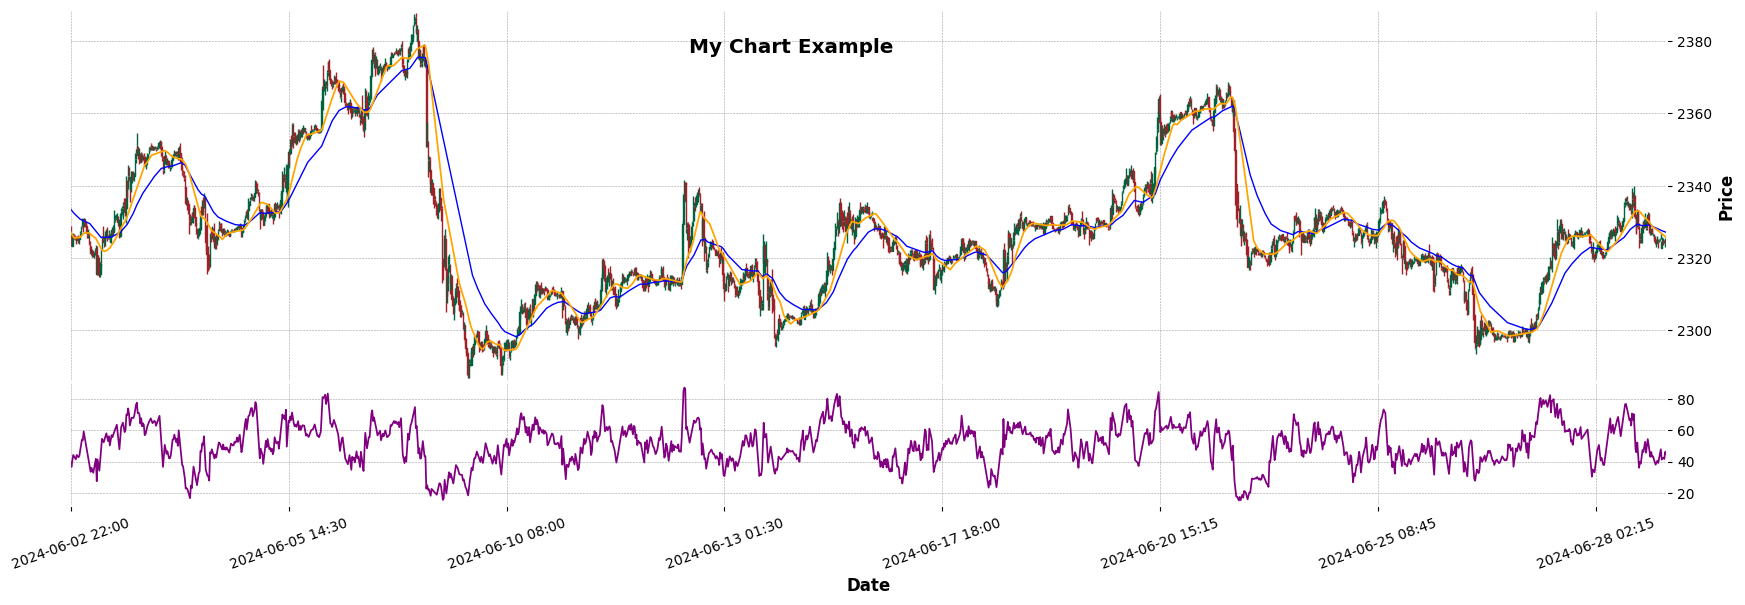

/home/avijit/PY.dev/dev.Chartter.v2/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


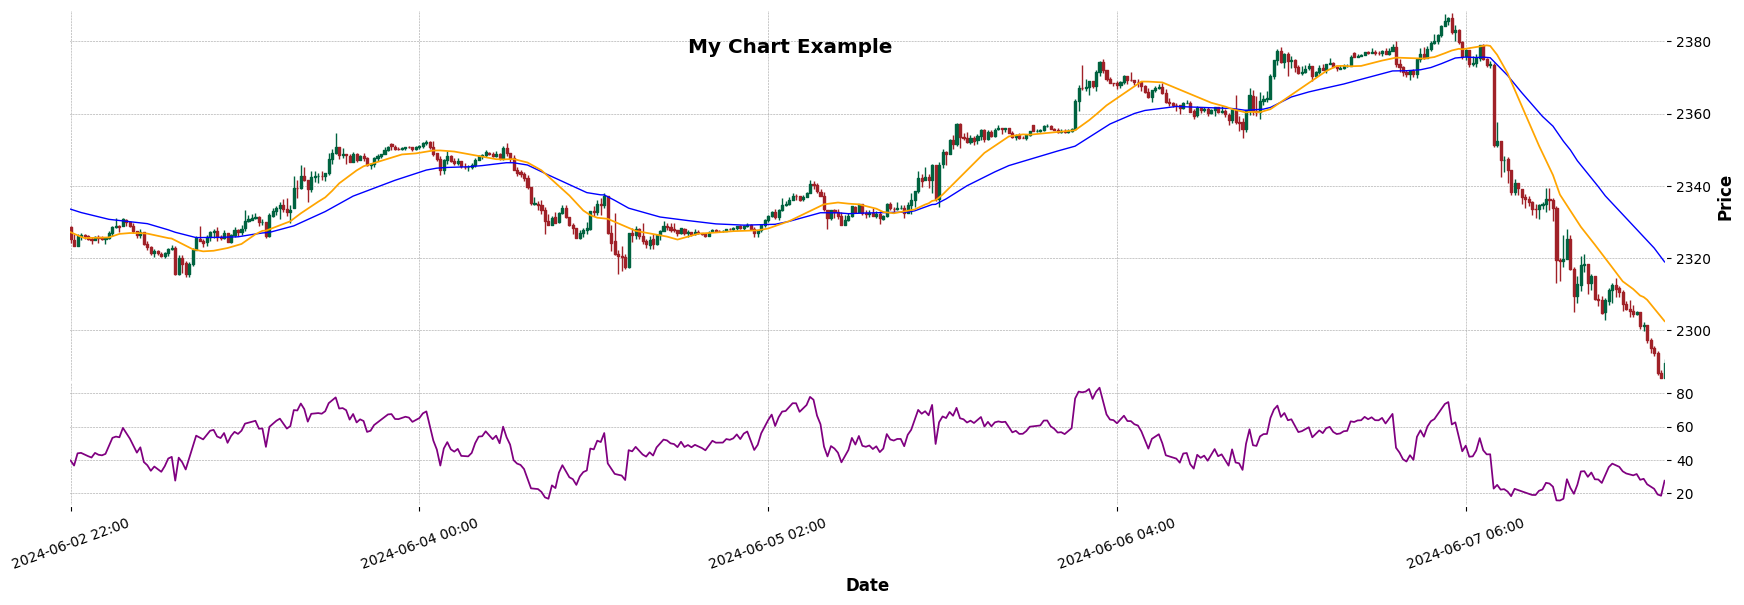

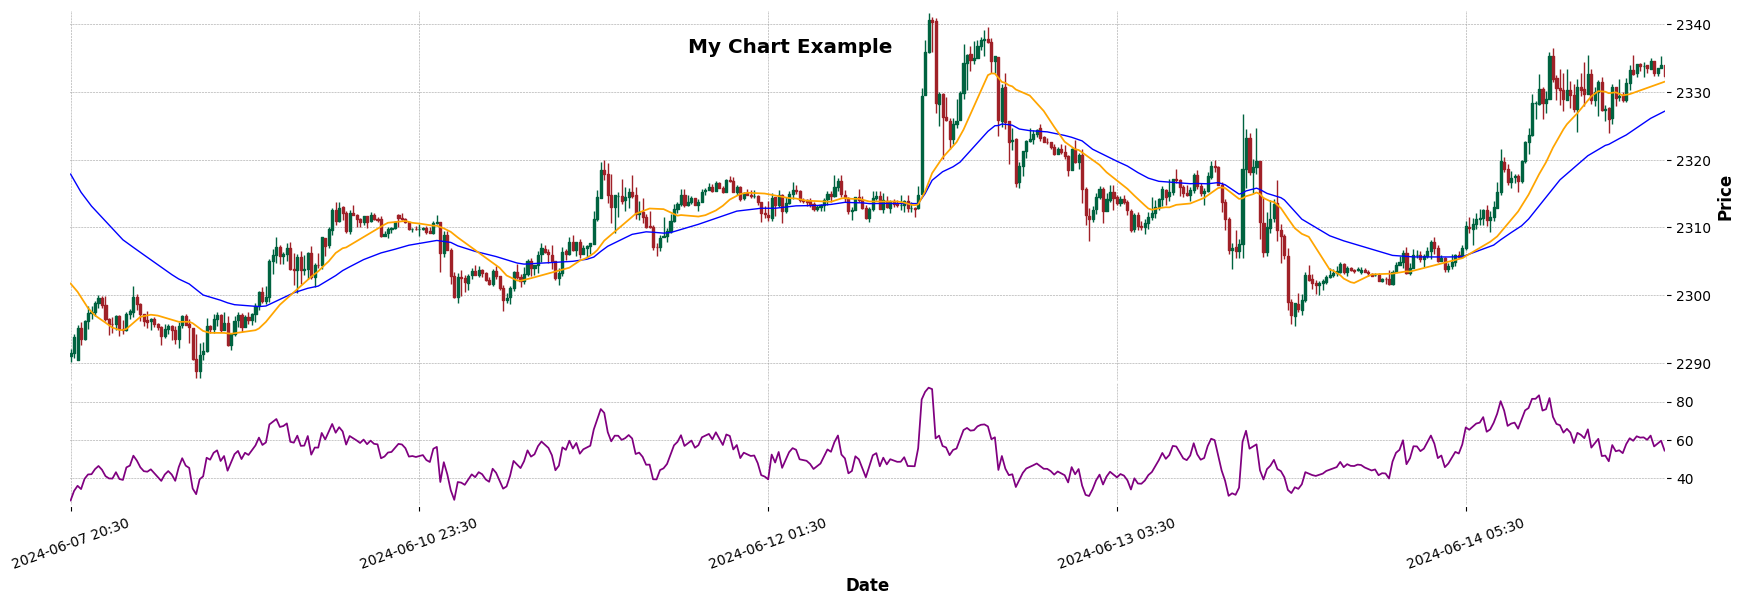

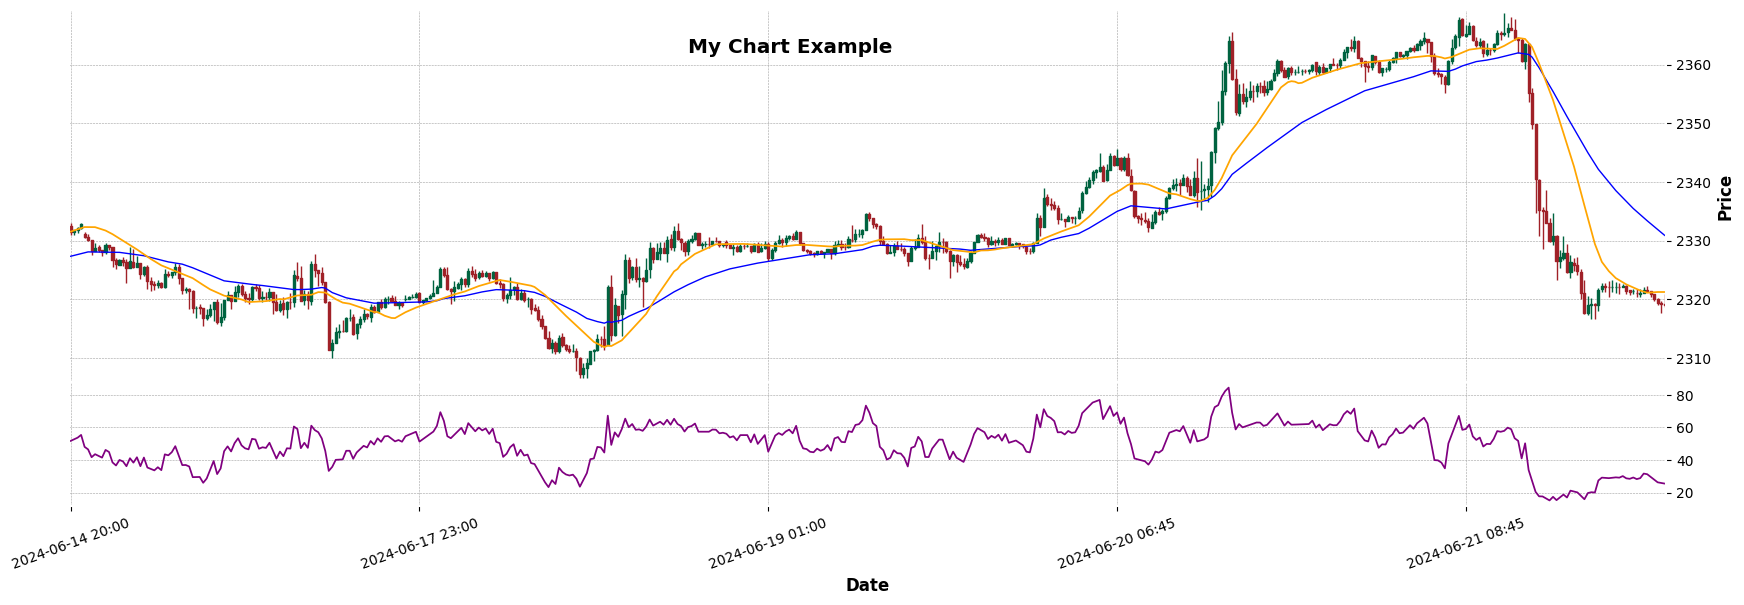

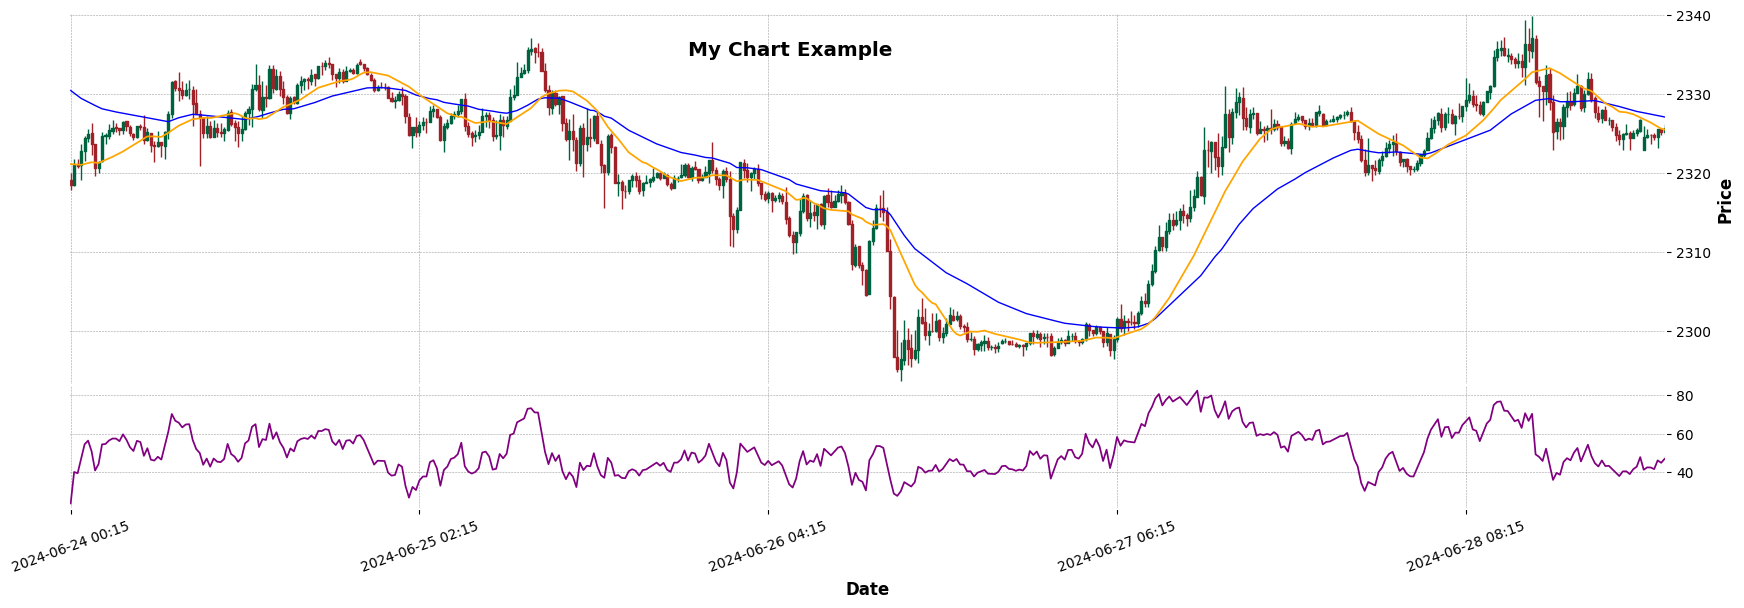

In [10]:
dta_show = dta.iloc[filtered.index[0]:filtered.index[-1]]

Chartter(dta_show, mkapds(dta_show))

# Chartter(dta_show, mkapds(dta_show))

splits = np.array_split(dta_show, 4)

df1, df2, df3 , df4 = splits

Chartter(df1, mkapds(df1))
Chartter(df2, mkapds(df2))
Chartter(df3, mkapds(df3))
Chartter(df4, mkapds(df4))
